# Project Statement

While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.

Using the dataset, find the factors that influence price negotiations while buying a house.

There are 79 explanatory variables describing every aspect of residential homes in Ames, Iowa.

# Perform the following steps:

1.	Understand the dataset:

    a.	Identify the shape of the dataset
    
    b.	Identify variables with null values
    
    c.	Identify variables with unique values
    
    
2.	Generate a separate dataset for numerical and categorical variables



3.	EDA of numerical variables:

    a.	Missing value treatment
    
    b.	Identify the skewness and distribution
    
    c.	Identify significant variables using a correlation matrix 
    
    d.	Pair plot for distribution and density
    
4.	EDA of categorical variables

    a.	Missing value treatment 
    
    b.	Count plot and box plot for bivariate analysis 
    
    c.	Identify significant variables using p-values and Chi-Square values
    
    
5.	Combine all the significant categorical and numerical variables


6.	Plot box plot for the new dataset to find the variables with outliers

## Step1 - Importing libraries

In [1]:
# importing librireis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To diplay the graphs in Jupyter notebook
%matplotlib inline

In [2]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

# Step 2 - Load the data set and perfrom below tasks

1. Identify the shape of the dataset

2. Identify variables with null values

3. Identify variables with unique values

In [3]:
df_pep = pd.read_csv('PEP1.csv')
df_pep.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_pep.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
df_pep.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [6]:
df_pep.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
# The id column is only a dumb identification with no correlation to SalePrice
df_pep.drop(columns=['Id'],inplace=True)
df_pep.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### 2.1. Identify the shape of the data  set

In [8]:
df_pep.shape

(1460, 80)

There are 1460 observations and 81 features are there in the data set.

In [9]:
# Check the column-wise info of the dataframe
df_pep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

data types look fine for all columns. NO Data type conversion will be required.

### Checking for Duplicate

In [10]:
df_pep.drop_duplicates().shape

(1460, 80)

There are no duplicate observations in the data set

### 2.2 Identify variables with null values

In [11]:
missing_value_count = df_pep.isnull().sum()

#Creating a dataframe for missing values
missing_value_df = pd.DataFrame({"Column_Name":df_pep.columns,'Missing_Value_Count':missing_value_count})
missing_value_df

Column_Name  Missing_Value_Count
MSSubClass        MSSubClass                    0
MSZoning            MSZoning                    0
LotFrontage      LotFrontage                  259
LotArea              LotArea                    0
Street                Street                    0
...                      ...                  ...
MoSold                MoSold                    0
YrSold                YrSold                    0
SaleType            SaleType                    0
SaleCondition  SaleCondition                    0
SalePrice          SalePrice                    0

[80 rows x 2 columns]

In [12]:
# Resetting index
missing_value_df.reset_index(inplace=True)
missing_value_df

index    Column_Name  Missing_Value_Count
0      MSSubClass     MSSubClass                    0
1        MSZoning       MSZoning                    0
2     LotFrontage    LotFrontage                  259
3         LotArea        LotArea                    0
4          Street         Street                    0
..            ...            ...                  ...
75         MoSold         MoSold                    0
76         YrSold         YrSold                    0
77       SaleType       SaleType                    0
78  SaleCondition  SaleCondition                    0
79      SalePrice      SalePrice                    0

[80 rows x 3 columns]

In [13]:
#filtering only the columns with at least 1 missing value
missing_value_df = missing_value_df[(missing_value_df.Missing_Value_Count)!=0]

#The number of columns with missing values
print('Columns with missing values:', len(missing_value_df['Missing_Value_Count']))

#sorting the columns by the number of missing values descending
missing_value_df.sort_values(by='Missing_Value_Count',ascending=False)

Columns with missing values: 19


index   Column_Name  Missing_Value_Count
71        PoolQC        PoolQC                 1453
73   MiscFeature   MiscFeature                 1406
5          Alley         Alley                 1369
72         Fence         Fence                 1179
56   FireplaceQu   FireplaceQu                  690
2    LotFrontage   LotFrontage                  259
57    GarageType    GarageType                   81
58   GarageYrBlt   GarageYrBlt                   81
59  GarageFinish  GarageFinish                   81
62    GarageQual    GarageQual                   81
63    GarageCond    GarageCond                   81
31  BsmtExposure  BsmtExposure                   38
34  BsmtFinType2  BsmtFinType2                   38
32  BsmtFinType1  BsmtFinType1                   37
30      BsmtCond      BsmtCond                   37
29      BsmtQual      BsmtQual                   37
25    MasVnrArea    MasVnrArea                    8
24    MasVnrType    MasVnrType                    8
41    Electrical    Electrical                    1

In [14]:
# Checking % of missing values and correspinding columns where percentage is greater thatn 40
missing_value_df['percent_missing'] = round(missing_value_df['Missing_Value_Count']/len(df_pep)*100,2)
missing_value_df[missing_value_df.percent_missing > 40]

index  Column_Name  Missing_Value_Count  percent_missing
5         Alley        Alley                 1369            93.77
56  FireplaceQu  FireplaceQu                  690            47.26
71       PoolQC       PoolQC                 1453            99.52
72        Fence        Fence                 1179            80.75
73  MiscFeature  MiscFeature                 1406            96.30

From all the missing features, the below features are having missing value percentage greate that 40 percent. The above features may be be removed from  the data set. This will be decided based on the further analysis.

### 2.3 Identify variables with unique values

In [15]:
# retrieving all Categorical columns names from the data set.
categoricalColumns = df_pep.select_dtypes(include='object').columns
categoricalColumns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
from pandas import Series

Series.unique(df_pep['Street'])

array(['Pave', 'Grvl'], dtype=object)

In [17]:
# calcualting Unique values count
unique_col_list=[]
for col in categoricalColumns:
    count_nunique = df_pep[col].nunique(dropna=False)
    unique_col_list.append(count_nunique)
unique_col_list[0:5]


[5, 2, 3, 4, 4]

In [18]:
Unique_dict     = {"Column_Name":categoricalColumns,'No_Of_Unique_Values':unique_col_list}
unique_value_df = pd.DataFrame(Unique_dict)
unique_value_df

Column_Name  No_Of_Unique_Values
0        MSZoning                    5
1          Street                    2
2           Alley                    3
3        LotShape                    4
4     LandContour                    4
5       Utilities                    2
6       LotConfig                    5
7       LandSlope                    3
8    Neighborhood                   25
9      Condition1                    9
10     Condition2                    8
11       BldgType                    5
12     HouseStyle                    8
13      RoofStyle                    6
14       RoofMatl                    8
15    Exterior1st                   15
16    Exterior2nd                   16
17     MasVnrType                    5
18      ExterQual                    4
19      ExterCond                    5
20     Foundation                    6
21       BsmtQual                    5
22       BsmtCond                    5
23   BsmtExposure                    5
24   BsmtFinType1                    7
25   BsmtFinType2                    7
26        Heating                    6
27      HeatingQC                    5
28     CentralAir                    2
29     Electrical                    6
30    KitchenQual                    4
31       Functiol                    7
32    FireplaceQu                    6
33     GarageType                    7
34   GarageFinish                    4
35     GarageQual                    6
36     GarageCond                    6
37     PavedDrive                    3
38         PoolQC                    4
39          Fence                    5
40    MiscFeature                    5
41       SaleType                    9
42  SaleCondition                    6

# Step 3:Generate a separate dataset for numerical and categorical variables

### 3.1 Numerical Daset 

In [19]:
NumercalDs = df_pep.select_dtypes(include=['int64','float64'])
NumercalDs.shape

(1460, 37)

In [20]:
NumercalDs.head(10)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   
5          50         85.0    14115            5            5       1993   
6          20         75.0    10084            8            5       2004   
7          60          NaN    10382            7            6       1973   
8          50         51.0     6120            7            5       1931   
9         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   
5          1995         0.0         732           0  ...          40   
6          2005       186.0        1369           0  ...         255   
7          1973       240.0         859          32  ...         235   
8          1950         0.0           0           0  ...          90   
9          1950         0.0         851           0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   
5           30              0        320            0         0      700   
6           57              0          0            0         0        0   
7          204            228          0            0         0      350   
8            0            205          0            0         0        0   
9            4              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  
5      10    2009     143000  
6       8    2007     307000  
7      11    2009     200000  
8       4    2008     129900  
9       1    2008     118000  

[10 rows x 37 columns]

In [21]:
NumercalDs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

### 3.2 Categorcal Data Set

In [229]:
CategoricalDs = df_pep.select_dtypes(include='object')
CategoricalDs.shape

(1460, 43)

In [230]:
CategoricalDs.head(10)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9       RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   
5      Mitchel       Norm  ...     Attchd          Unf         TA         TA   
6      Somerst       Norm  ...     Attchd          RFn         TA         TA   
7       NWAmes       PosN  ...     Attchd          RFn         TA         TA   
8      OldTown     Artery  ...     Detchd          Unf         Fa         TA   
9      BrkSide     Artery  ...     Attchd          RFn         Gd         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN    NaN         NaN       WD        Normal  
1          Y    NaN    NaN         NaN       WD        Normal  
2          Y    NaN    NaN         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD       Abnorml  
4          Y    NaN    NaN         NaN       WD        Normal  
5          Y    NaN  MnPrv        Shed       WD        Normal  
6          Y    NaN    NaN         NaN       WD        Normal  
7          Y    NaN    NaN        Shed       WD        Normal  
8          Y    NaN    NaN         NaN       WD       Abnorml  
9          Y    NaN    NaN         NaN       WD        Normal  

[10 rows x 43 columns]

In [231]:
CategoricalDs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

# 4 EDA of numerical variables:

4.1 Missing value treatment

4.2 Identify the skewness and distribution

4.3 Identify significant variables using a correlation matrix

4.4 Pair plot for distribution and density

### 4.1 Missing value treatment

In [232]:
Nr_missing_value_count = NumercalDs.isnull().sum()

Numerical_missing_df = pd.DataFrame({"Column_Name":NumercalDs.columns,'Missing_Value_Count':Nr_missing_value_count})

#filtering only the columns with at least 1 missing value
Numerical_missing_df = Numerical_missing_df[(Numerical_missing_df.Missing_Value_Count)!=0]

#The number of columns with missing values
print('Columns with missing values:', len(Numerical_missing_df['Missing_Value_Count']))

# Checking % of missing values and correspinding columns where percentage.
Numerical_missing_df['percent_missing'] = round(Numerical_missing_df['Missing_Value_Count']/len(df_pep)*100,2)
Numerical_missing_df

Columns with missing values: 0


Empty DataFrame
Columns: [Column_Name, Missing_Value_Count, percent_missing]
Index: []

1. There are 259 values are missing for Linear feet of street connected to property

2. There are 8 values are missing for Masonry veneer area in square feet

3. There are 81 values Year garage was built.

#### 4.1.1 Missing value treatment for LotFrontage - Linear feet of street connected to property

In [26]:
#Checking missing value for LotFrontage
NumercalDs[NumercalDs['LotFrontage'].isnull()].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
7           60          NaN    10382            7            6       1973   
12          20          NaN    12968            5            6       1962   
14          20          NaN    10920            6            5       1960   
16          20          NaN    11241            6            7       1970   
24          20          NaN     8246            5            8       1968   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
7           1973       240.0         859          32  ...         235   
12          1962         0.0         737           0  ...         140   
14          1960       212.0         733           0  ...           0   
16          1970       180.0         578           0  ...           0   
24          2001         0.0         188         668  ...         406   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
7           204            228          0            0         0      350   
12            0              0          0          176         0        0   
14          213            176          0            0         0        0   
16            0              0          0            0         0      700   
24           90              0          0            0         0        0   

    MoSold  YrSold  SalePrice  
7       11    2009     200000  
12       9    2008     144000  
14       5    2008     157000  
16       3    2010     149000  
24       5    2010     154000  

[5 rows x 37 columns]

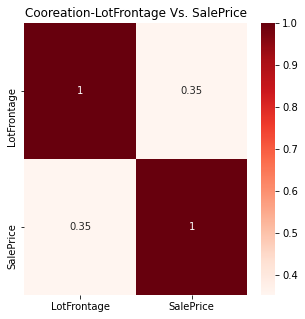

In [27]:
# Checking the correlation between LotFrontage and Salesprice
plt.figure(figsize=(5,5))
plt.title("Cooreation-LotFrontage Vs. SalePrice")
sns.heatmap(NumercalDs[['LotFrontage','SalePrice']].corr(),annot=True,cmap="Reds")
plt.show()

Note that LotFrontage is having a positive correlation with SalePrice, but this correlation isn’t very strong. To simplify this analisys, we can replace the null values with medain. 

In [28]:
LotFrontage_Median = NumercalDs[~NumercalDs['LotFrontage'].isnull()].median()[1]
LotFrontage_Median

69.0

In [29]:
NumercalDs['LotFrontage'].fillna(LotFrontage_Median,inplace=True)

In [30]:
#Checkin null values for LotFrontage
NumercalDs.LotFrontage.isnull().sum()

0

All Null values for LotFrontage is replace with median value.

#### 4.1.2. Missing value treatment for MasVnrArea - Masonry veneer area in square feet

In [31]:
#Checking missing value for MasVnrArea
NumercalDs[NumercalDs['MasVnrArea'].isnull()]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
234           60         69.0     7851            6            5       2002   
529           20         69.0    32668            6            3       1957   
650           60         65.0     8125            7            6       2007   
936           20         67.0    10083            7            5       2003   
973           20         95.0    11639            7            5       2007   
977          120         35.0     4274            7            5       2006   
1243          20        107.0    13891           10            5       2006   
1278          60         75.0     9473            8            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
234           2002         NaN         625           0  ...         288   
529           1975         NaN        1219           0  ...           0   
650           2007         NaN           0           0  ...           0   
936           2003         NaN         833           0  ...           0   
973           2008         NaN           0           0  ...           0   
977           2007         NaN        1106           0  ...           0   
1243          2006         NaN        1386           0  ...         216   
1278          2002         NaN         804           0  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
234            48              0          0            0         0        0   
529             0            200          0            0         0        0   
650             0              0          0            0         0        0   
936            41              0          0            0         0        0   
973           120              0          0            0         0        0   
977           116              0          0            0         0        0   
1243          229              0          0            0         0        0   
1278          211              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
234        5    2010     216500  
529        3    2007     200624  
650        5    2008     205950  
936        8    2009     184900  
973       12    2008     182000  
977       11    2007     199900  
1243       9    2006     465000  
1278       3    2008     237000  

[8 rows x 37 columns]

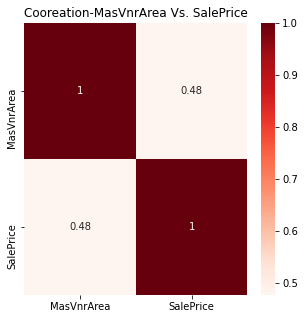

In [32]:
# Checking the correlation between MasVnrArea and Salesprice
plt.figure(figsize=(5,5))
plt.title("Cooreation-MasVnrArea Vs. SalePrice")
sns.heatmap(NumercalDs[['MasVnrArea','SalePrice']].corr(),annot=True,cmap="Reds")
plt.show()

Note that MasVnrArea is having a positive correlation with SalePrice, but this correlation isn’t very strong which is less than 0.50. To simplify this analisys, we can remove the null values from the data set as there are only 8 data values missing.

In [33]:
NumercalDs=NumercalDs[~NumercalDs['MasVnrArea'].isnull()]

In [34]:
#Checking the null values count for MasVnrArea
NumercalDs.MasVnrArea.isnull().sum()

0

#### 4.1.3. Missing value treatment for GarageYrBlt - Year garage was built

In [35]:
# Checking the null values details 
NumercalDs[NumercalDs.GarageYrBlt.isnull()].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
39          90         65.0     6040            4            5       1955   
48         190         33.0     4456            4            5       1920   
78          90         72.0    10778            4            5       1968   
88          50        105.0     8470            3            2       1915   
89          20         60.0     8070            4            5       1994   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
39          1955         0.0           0           0  ...           0   
48          2008         0.0           0           0  ...           0   
78          1968         0.0           0           0  ...           0   
88          1982         0.0           0           0  ...           0   
89          1995         0.0         588           0  ...           0   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
39            0              0          0            0         0        0   
48            0            102          0            0         0        0   
78            0              0          0            0         0        0   
88            0            156          0            0         0        0   
89            0              0          0            0         0        0   

    MoSold  YrSold  SalePrice  
39       6    2008      82000  
48       6    2009     113000  
78       4    2010     136500  
88      10    2009      85000  
89       8    2007     123600  

[5 rows x 37 columns]

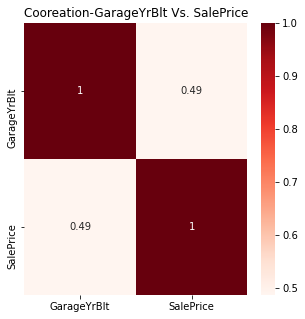

In [36]:
# Checking the cooreation between GarageYrBlt Vs. SalePrice
plt.figure(figsize=(5,5))
plt.title("Cooreation-GarageYrBlt Vs. SalePrice")
sns.heatmap(NumercalDs[['GarageYrBlt','SalePrice']].corr(),annot=True,cmap='Reds')
plt.show()

Note that GarageYrBlt is having a positive correlation with SalePrice, but this correlation isn’t very strong which is less than 0.50. To simplify this analisys, we can remove the null values from the data set.

In [37]:
NumercalDs=NumercalDs[~NumercalDs.GarageYrBlt.isnull()]

In [38]:
#Check the null value count.
NumercalDs.GarageYrBlt.isnull().sum()

0

In [38]:
# Checking null count for all Numerical Varibles
NumercalDs.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

There are no null values present for Numercal features.

### 4.2 Identify the skewness and distribution

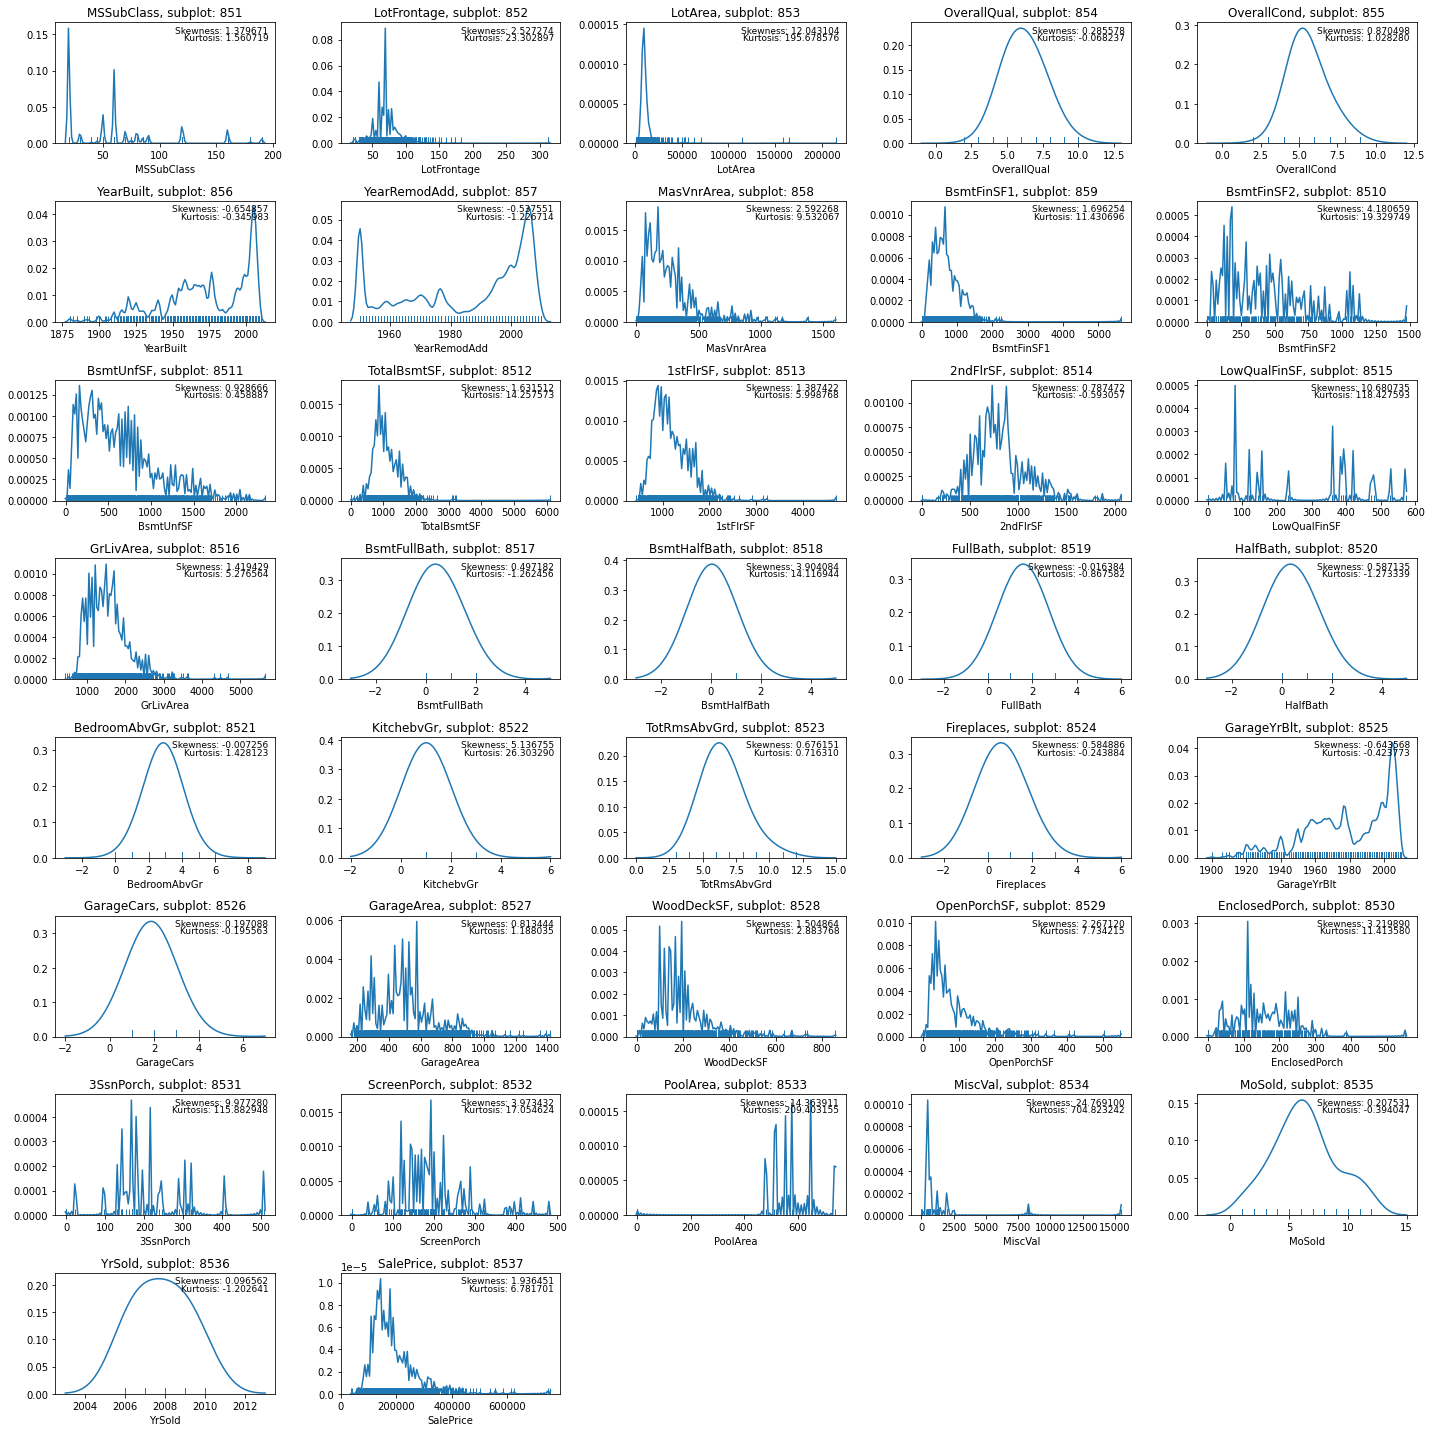

In [39]:
# Integer Data - Analysis by plotting Distribution plots
m = 8  # number of rows
n = 5  # number of columns
p = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))


for i in NumercalDs.columns:
    ax = plt.subplot(m, n, p)
    plt.title('{}, subplot: {}{}{}'.format(i, m, n, p))
    plt.xlabel(i)
    sns.distplot(NumercalDs[i], hist = False, rug = True, kde_kws = {'bw' : 1})
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % NumercalDs[i].skew(),\
        fontsize=9, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % NumercalDs[i].kurt(),\
        fontsize=9, verticalalignment='top', horizontalalignment='right')
    p = p + 1

fig.tight_layout()
plt.show()

### 4.3 Identify significant variables using a correlation matrix

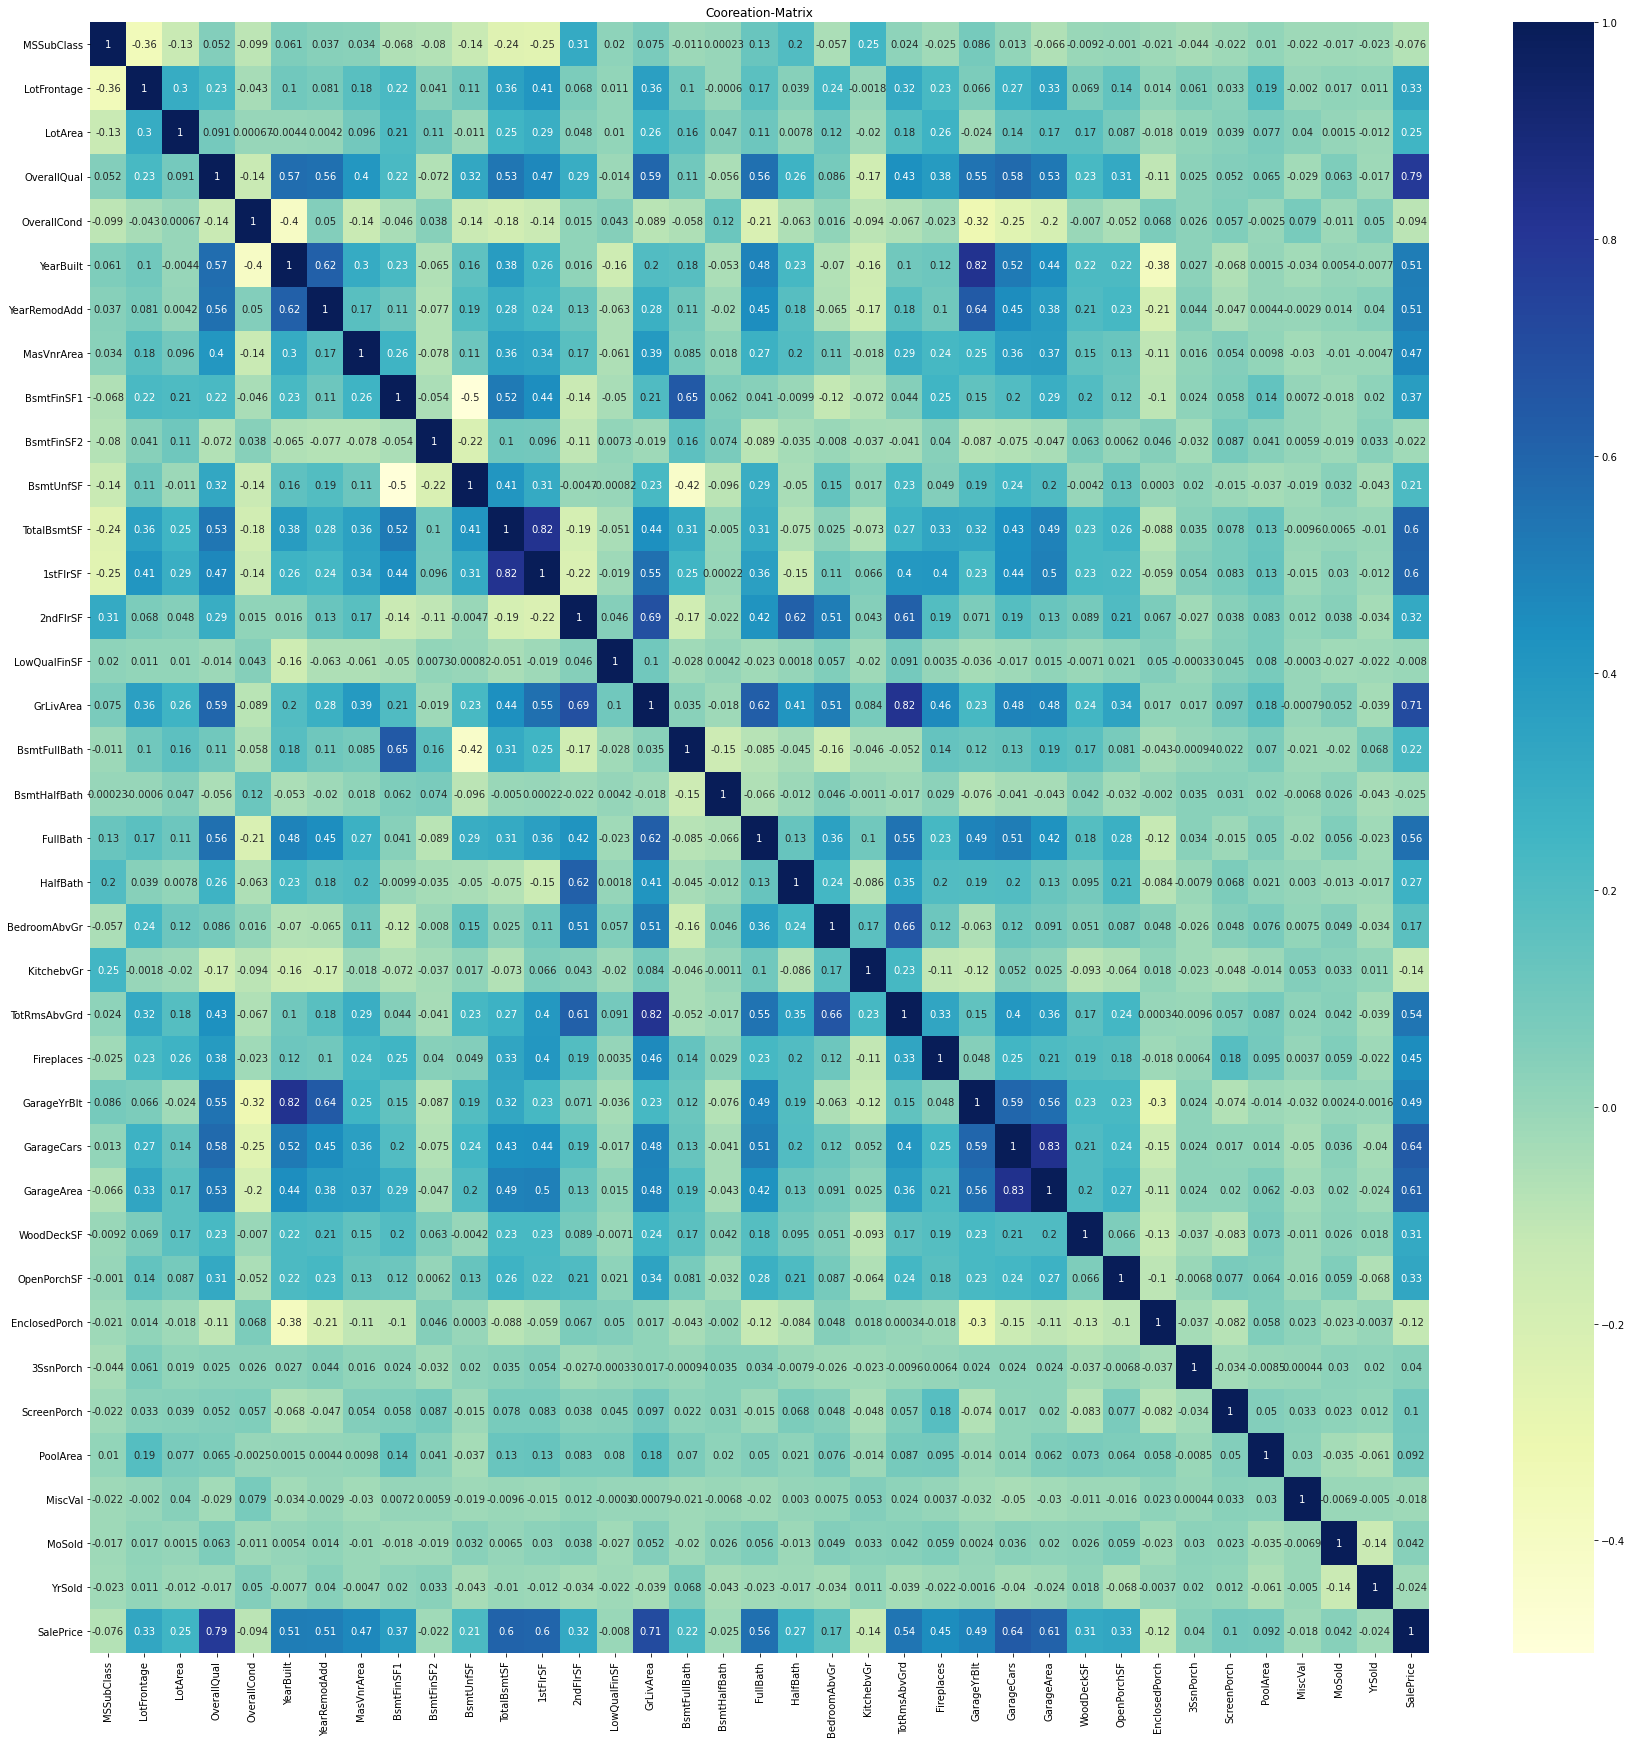

In [40]:
plt.figure(figsize=(30,30))
plt.title("Cooreation-Matrix")
sns.heatmap(NumercalDs.corr(),annot=True,cmap='YlGnBu')
plt.show()

By looking at the above cooreation map - 

1. OverallQual , YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea features are strong postive correlation with the SalePrice (Target) Feature.  These features can be considered as significant features.

2. There are other features postive and Negative correlation with SalesPrice, but this correlation isn’t very strong which is less than 0.50 or -0.50. These features can be ignore.

3. Please note that this conclusion in based on cooreation with Target feature. This will required further analysis on multicolinearity, P-value to come up with significant features.

#### 4.4 Pair plot for distribution and density

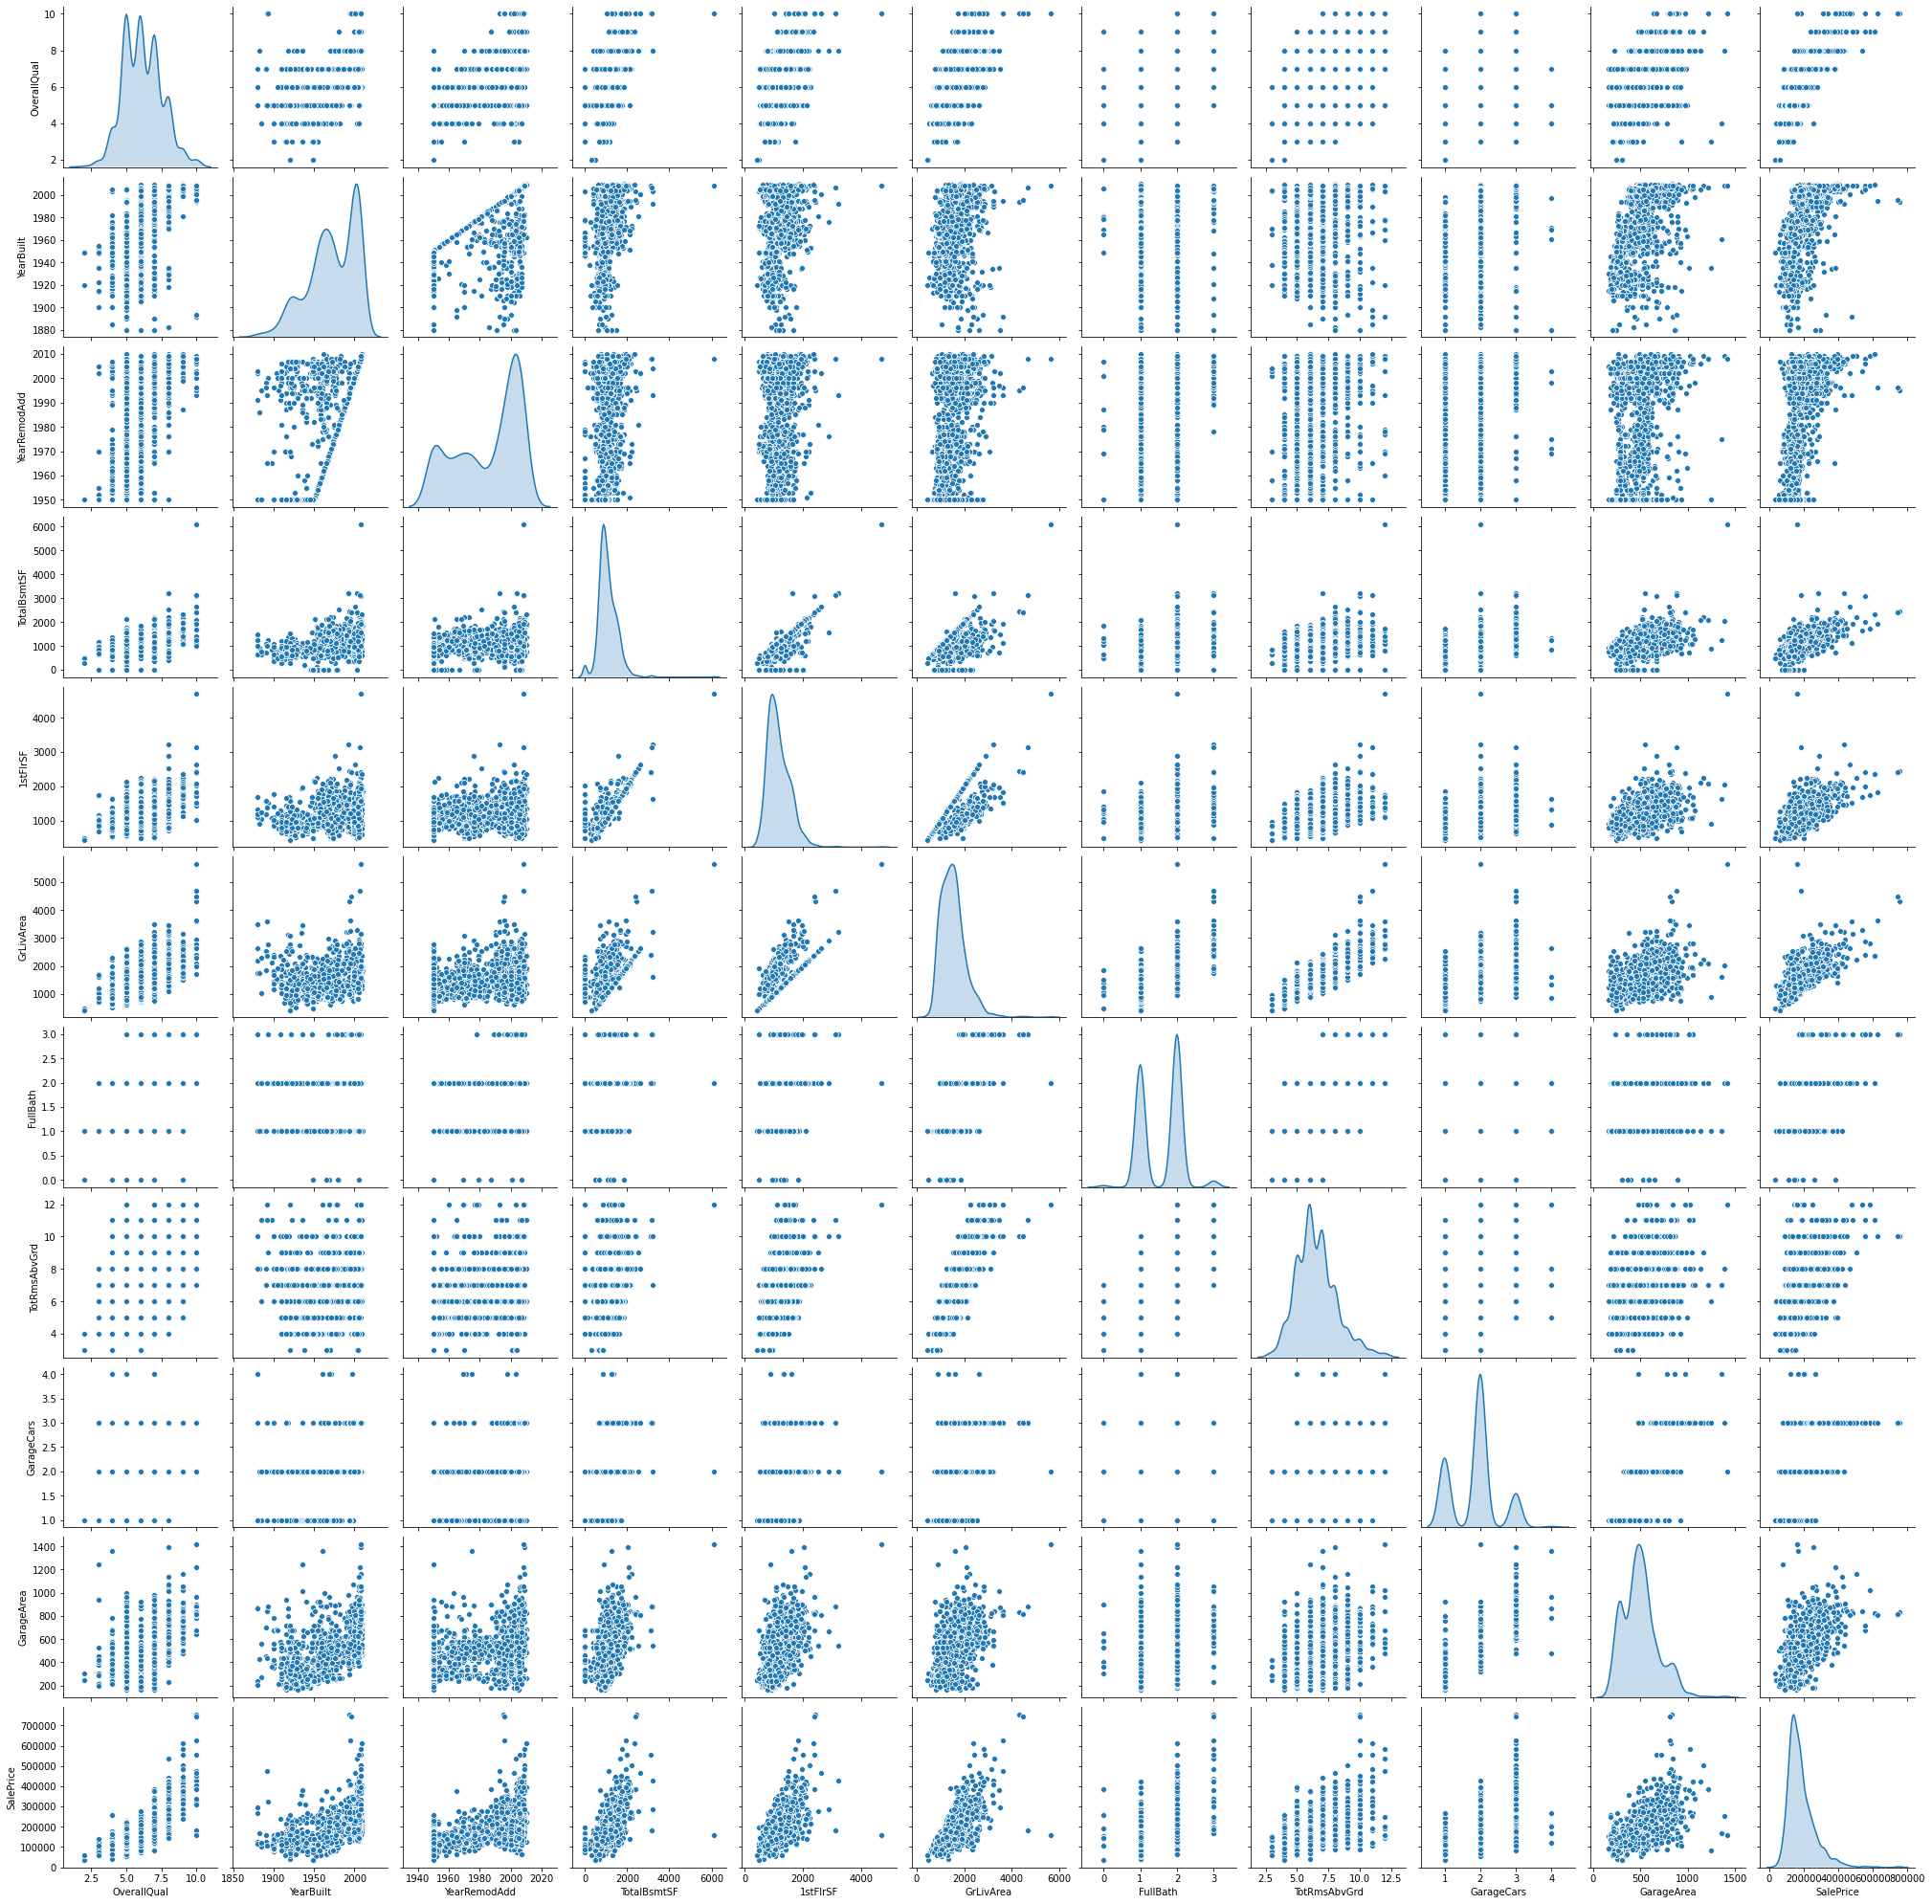

In [42]:
#Pair plot
sns.pairplot(NumercalDs[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice' ]]
            ,kind='scatter',diag_kind = 'kde')
plt.show()

# 5 EDA of Categorical variables:
5.1 Missing value treatment

5.2 Count plot and box plot for bivariate analysis

5.3 Identify significant variables using p-values and Chi-Square values


#### 5.1 Missing value treatment

In [233]:
ct_missing_value_count = CategoricalDs.isnull().sum()

Categorical_missing_df = pd.DataFrame({"Column_Name":CategoricalDs.columns,'Missing_Value_Count':ct_missing_value_count})

#filtering only the columns with at least 1 missing value
Categorical_missing_df = Categorical_missing_df[(Categorical_missing_df.Missing_Value_Count)!=0]

#The number of columns with missing values
print('Columns with missing values:', len(Categorical_missing_df['Missing_Value_Count']))

# Checking % of missing values and correspinding columns where percentage.
Categorical_missing_df['percent_missing'] = round(Categorical_missing_df['Missing_Value_Count']/len(df_pep)*100,2)
Categorical_missing_df

Columns with missing values: 16


Column_Name  Missing_Value_Count  percent_missing
Alley                Alley                 1369            93.77
MasVnrType      MasVnrType                    8             0.55
BsmtQual          BsmtQual                   37             2.53
BsmtCond          BsmtCond                   37             2.53
BsmtExposure  BsmtExposure                   38             2.60
BsmtFinType1  BsmtFinType1                   37             2.53
BsmtFinType2  BsmtFinType2                   38             2.60
Electrical      Electrical                    1             0.07
FireplaceQu    FireplaceQu                  690            47.26
GarageType      GarageType                   81             5.55
GarageFinish  GarageFinish                   81             5.55
GarageQual      GarageQual                   81             5.55
GarageCond      GarageCond                   81             5.55
PoolQC              PoolQC                 1453            99.52
Fence                Fence                 1179            80.75
MiscFeature    MiscFeature                 1406            96.30

Removing features from the data set for which missing percentage is greater thatn 40 percent

In [234]:
Features_Gt_40Miss =['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
CategoricalDs.drop(Features_Gt_40Miss,inplace=True,axis=1)

In [235]:
CategoricalDs.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functiol  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd      Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA      Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd      Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd      Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd      Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [236]:
ct_missing_value_count = CategoricalDs.isnull().sum()

Categorical_missing_df = pd.DataFrame({"Column_Name":CategoricalDs.columns,'Missing_Value_Count':ct_missing_value_count})

#filtering only the columns with at least 1 missing value
Categorical_missing_df = Categorical_missing_df[(Categorical_missing_df.Missing_Value_Count)!=0]

#The number of columns with missing values
print('Columns with missing values:', len(Categorical_missing_df['Missing_Value_Count']))

# Checking % of missing values and correspinding columns where percentage.
Categorical_missing_df['percent_missing'] = round(Categorical_missing_df['Missing_Value_Count']/len(df_pep)*100,2)
Categorical_missing_df

Columns with missing values: 11


Column_Name  Missing_Value_Count  percent_missing
MasVnrType      MasVnrType                    8             0.55
BsmtQual          BsmtQual                   37             2.53
BsmtCond          BsmtCond                   37             2.53
BsmtExposure  BsmtExposure                   38             2.60
BsmtFinType1  BsmtFinType1                   37             2.53
BsmtFinType2  BsmtFinType2                   38             2.60
Electrical      Electrical                    1             0.07
GarageType      GarageType                   81             5.55
GarageFinish  GarageFinish                   81             5.55
GarageQual      GarageQual                   81             5.55
GarageCond      GarageCond                   81             5.55

#### 5.1.1 Handling missing value for  MasVnrType - Masonry veneer type


In [237]:
#Checking value counts for MasVnrType
CategoricalDs.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [238]:
#Checking null values for Masonry
CategoricalDs[CategoricalDs.MasVnrType.isnull()]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
234        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
529        RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
650        FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
936        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
973        FV   Pave      Reg         Lvl    AllPub    Corner       Gtl   
977        FV   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1243       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1278       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functiol  \
234       Gilbert       Norm       Norm  ...      SBrkr          Gd      Typ   
529       Crawfor       Norm       Norm  ...      SBrkr          TA     Maj1   
650       Somerst       Norm       Norm  ...      SBrkr          Gd      Typ   
936       SawyerW       Norm       Norm  ...      SBrkr          Gd      Typ   
973       Somerst       Norm       Norm  ...      SBrkr          Gd      Typ   
977       Somerst       Norm       Norm  ...      SBrkr          Gd      Typ   
1243      NridgHt       Norm       Norm  ...      SBrkr          Ex      Typ   
1278      CollgCr       Norm       Norm  ...      SBrkr          Gd      Typ   

     GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
234     BuiltIn          Fin         TA         TA          Y       WD   
529      Attchd          RFn         TA         TA          Y       WD   
650      Attchd          RFn         TA         TA          Y       WD   
936      Attchd          RFn         TA         TA          Y       WD   
973      Attchd          Fin         TA         TA          Y      New   
977      Attchd          Fin         TA         TA          Y      New   
1243     Attchd          Fin         TA         TA          Y      New   
1278     Attchd          RFn         TA         TA          Y       WD   

     SaleCondition  
234         Normal  
529         Alloca  
650         Normal  
936         Normal  
973        Partial  
977        Partial  
1243       Partial  
1278        Normal  

[8 rows x 38 columns]

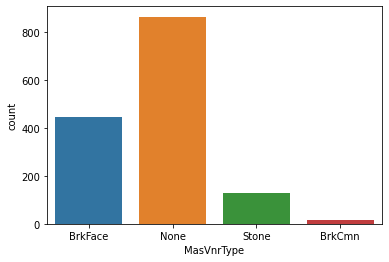

In [239]:
#Count plot
sns.countplot(x='MasVnrType',data=CategoricalDs)
plt.show()

In [240]:
Cat_MasVnrType_mode=CategoricalDs.MasVnrType.mode()[0]
Cat_MasVnrType_mode

'None'

In [241]:
#Filling NA with MasVnrType Mode 
CategoricalDs['MasVnrType'].fillna(Cat_MasVnrType_mode,inplace=True)

In [242]:
#Checking Null count for MasVnrType
CategoricalDs.MasVnrType.isnull().sum()

0

In [243]:
columns2 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "Electrical", "GarageType", "GarageFinish","GarageQual", "GarageCond"]

for col in columns2:
    col_mode = CategoricalDs[col].mode()[0]
    print("The mode is:",col,'is:',col_mode)

The mode is: BsmtQual is: TA
The mode is: BsmtCond is: TA
The mode is: BsmtExposure is: No
The mode is: BsmtFinType1 is: Unf
The mode is: BsmtFinType2 is: Unf
The mode is: Electrical is: SBrkr
The mode is: GarageType is: Attchd
The mode is: GarageFinish is: Unf
The mode is: GarageQual is: TA
The mode is: GarageCond is: TA


In [244]:
#Replacing all NAN values with their mode
for col in columns2:
    col_mode = CategoricalDs[col].mode()[0]
    CategoricalDs[col].fillna(col_mode,inplace=True)

In [245]:
#Checking null count
CategoricalDs[columns2].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

All null values are repalced with their mode

### 5.2 Count plot and box plot for bivariate analysis

#### 5.2.1 Count Plot

In [246]:
CategoricalDs.shape

(1460, 38)

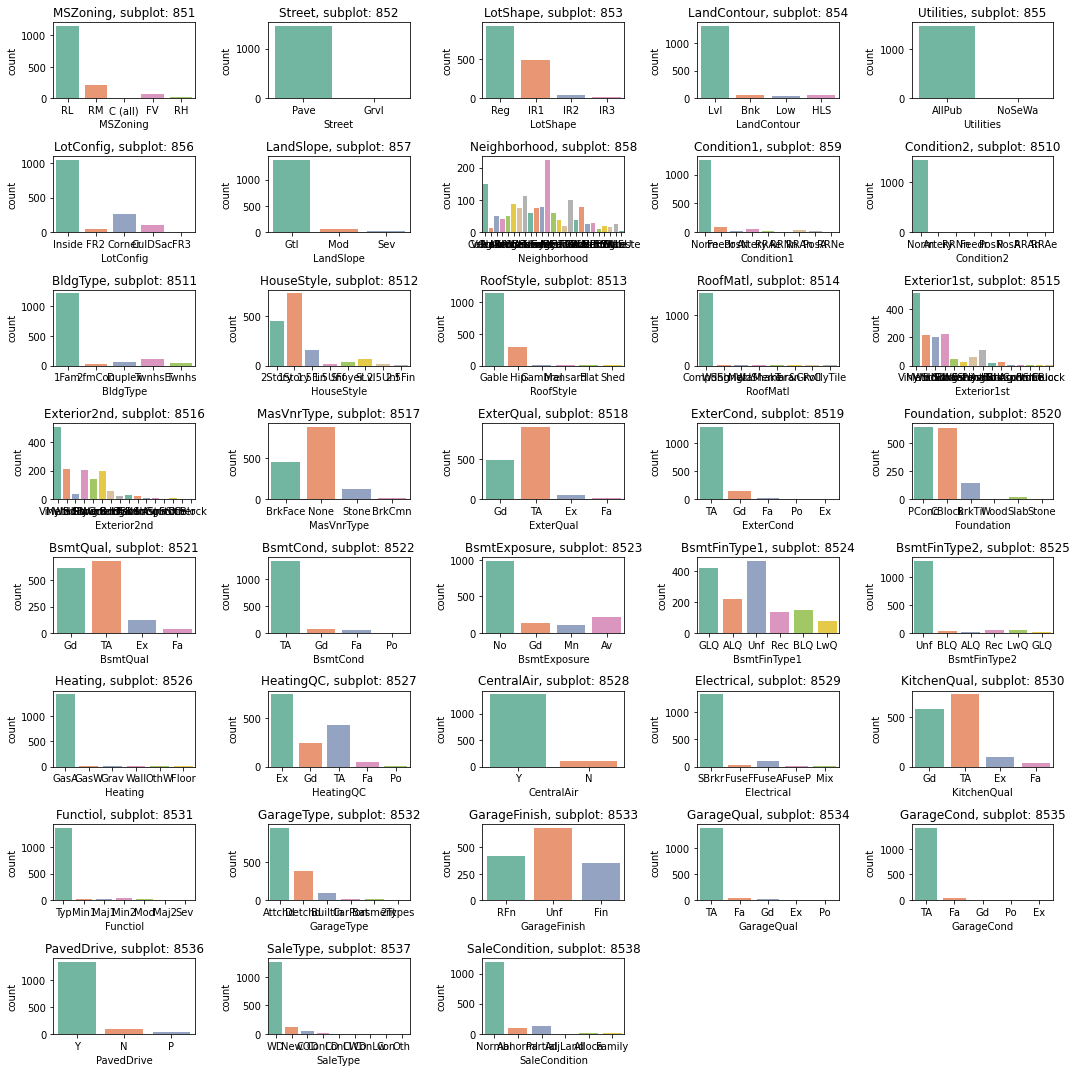

In [247]:
m = 8  # number of rows
n = 5  # number of columns
q = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in CategoricalDs.columns:
    plt.subplot(m, n, q)
    plt.title('{}, subplot: {}{}{}'.format(i, m, n, q))
    plt.xlabel(i)
    sns.countplot(CategoricalDs[i],palette="Set2")
    q = q + 1

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

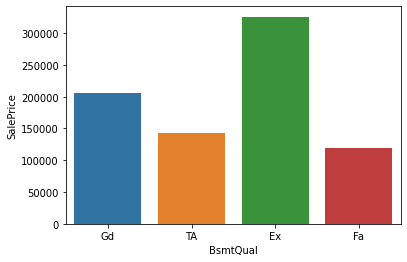

In [248]:
sns.barplot(x=CategoricalDs.BsmtQual,y=NumercalDs.SalePrice,ci=None)

#### 5.2.2 Bivaraite analysis

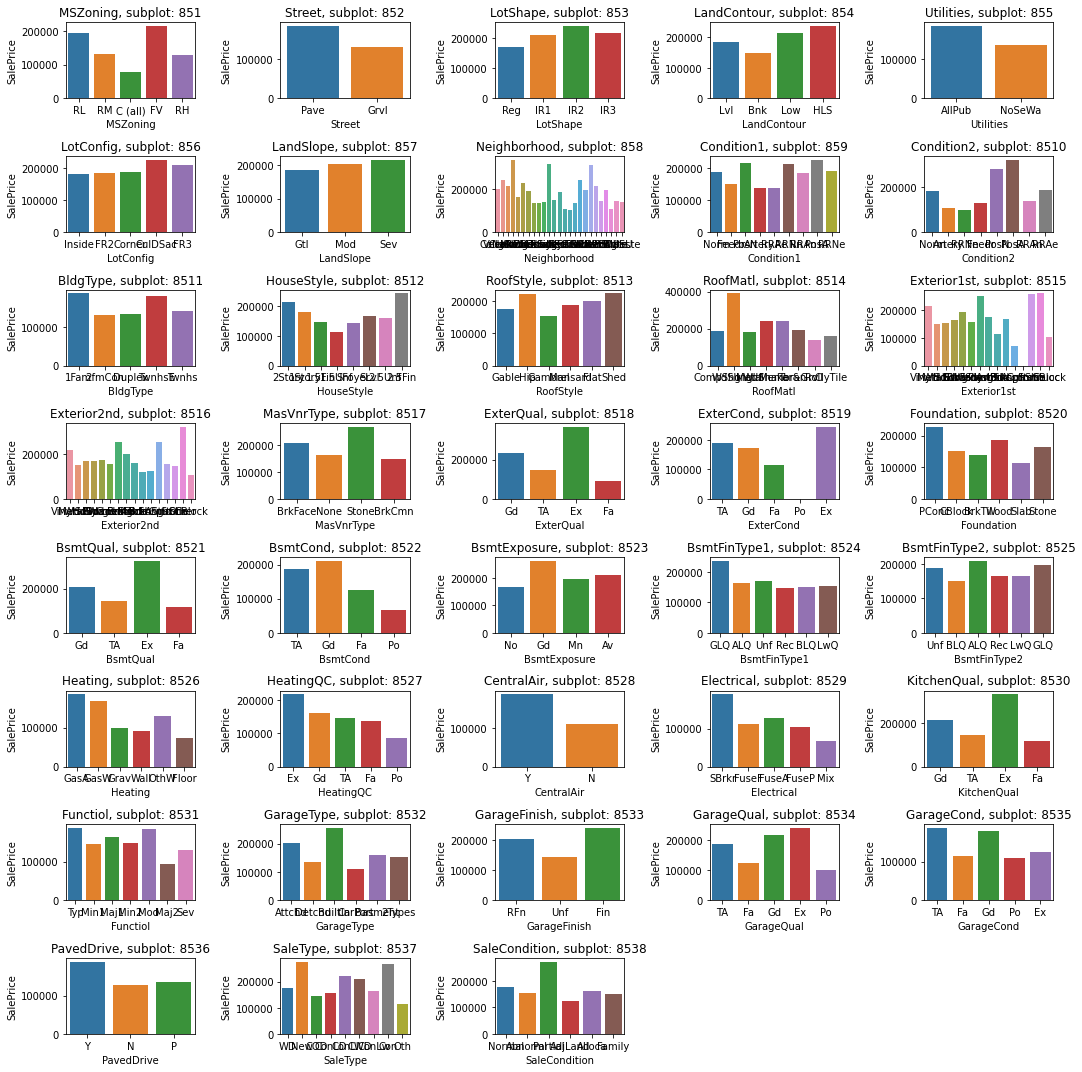

In [249]:
m = 8  # number of rows
n = 5  # number of columns
q = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in CategoricalDs.columns:
    plt.subplot(m, n, q)
    plt.title('{}, subplot: {}{}{}'.format(i, m, n, q))
    plt.xlabel(i)
    sns.barplot(x=CategoricalDs[i],y=NumercalDs.SalePrice,ci=None)
    q = q + 1

fig.tight_layout()
plt.show()

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


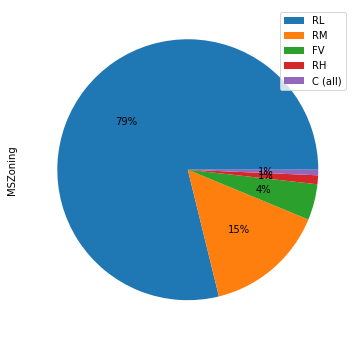

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


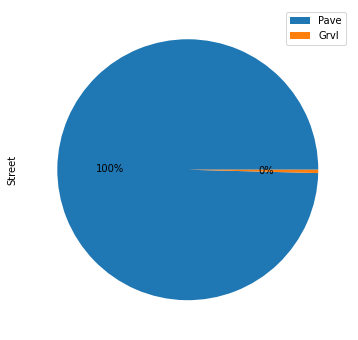

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


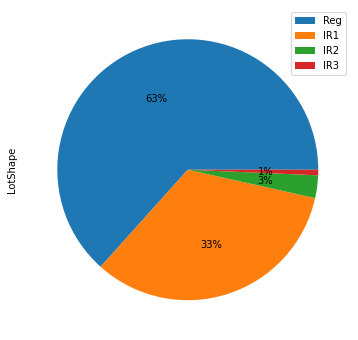

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


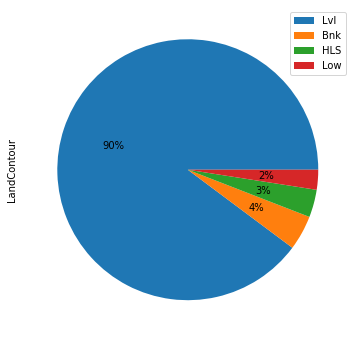

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


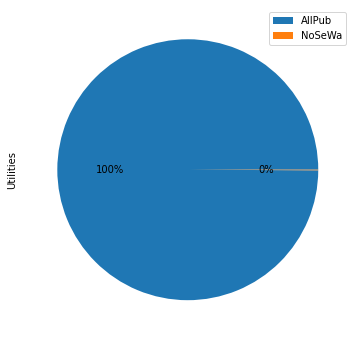

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


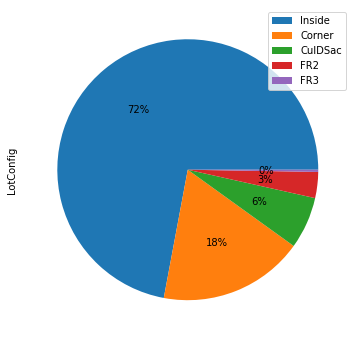

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


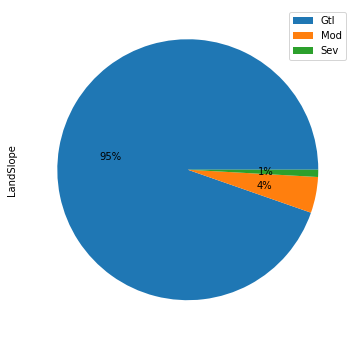

mes        0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64


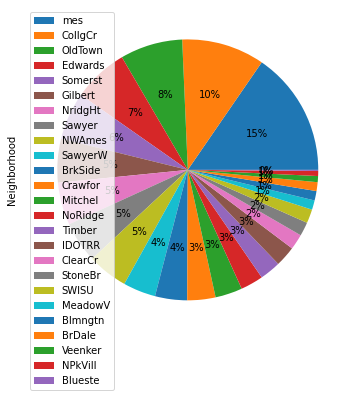

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64


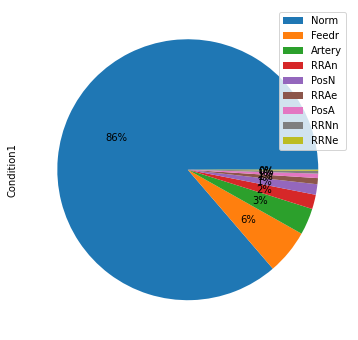

Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
PosA      0.000685
Name: Condition2, dtype: float64


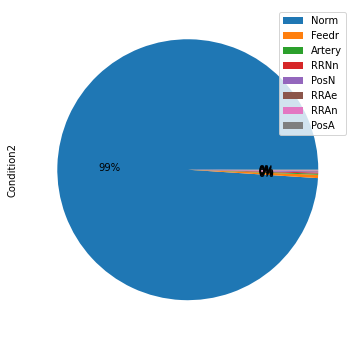

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


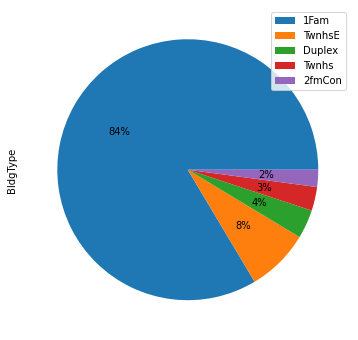

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


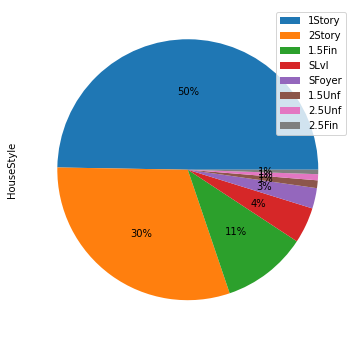

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64


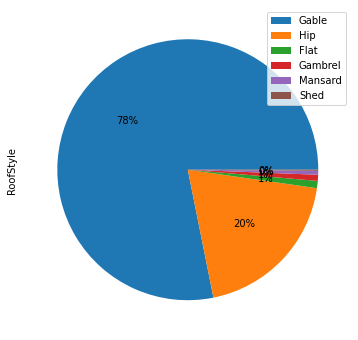

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Roll       0.000685
Metal      0.000685
Membran    0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64


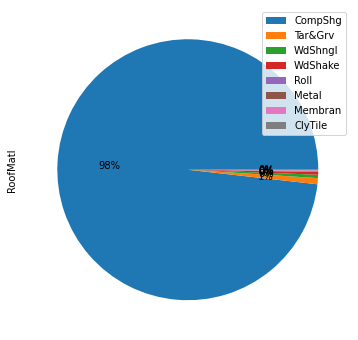

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
ImStucc    0.000685
CBlock     0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64


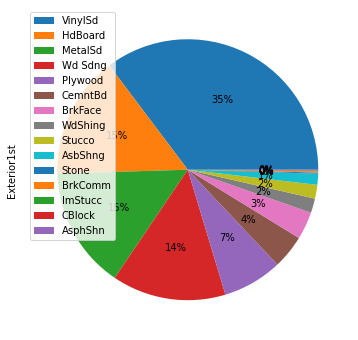

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64


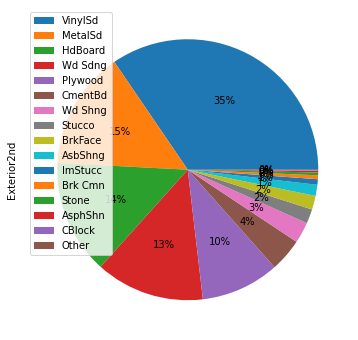

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64


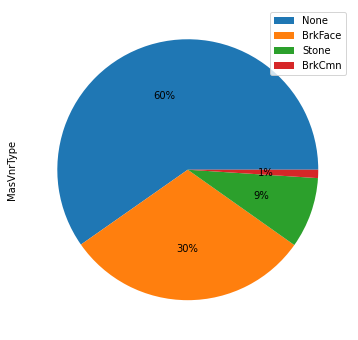

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64


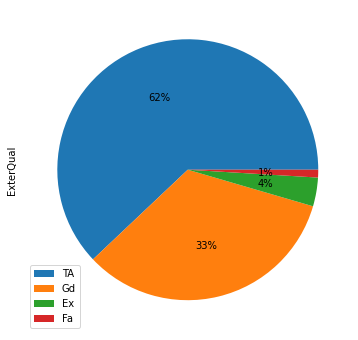

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64


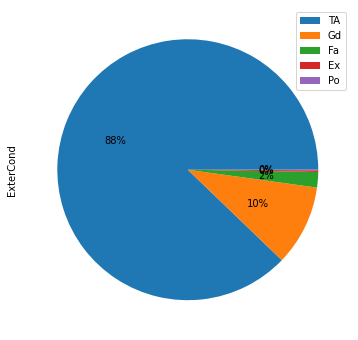

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64


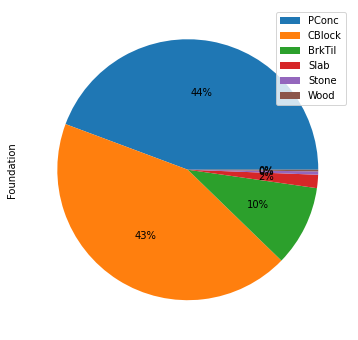

TA    0.469863
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64


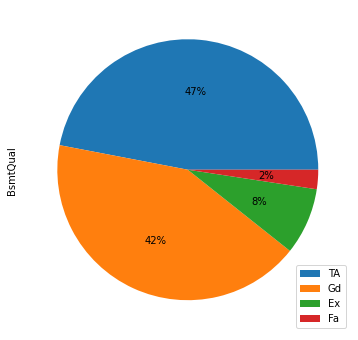

TA    0.923288
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64


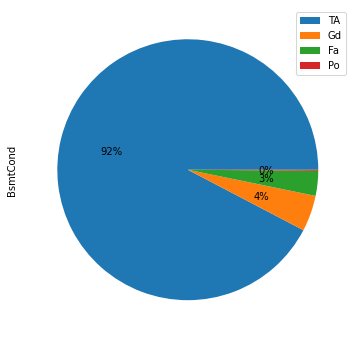

No    0.678767
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64


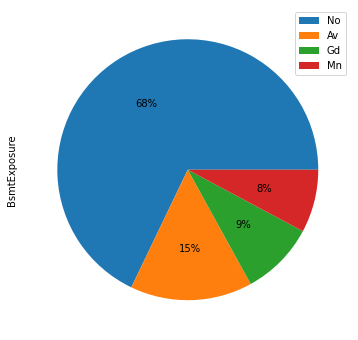

Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64


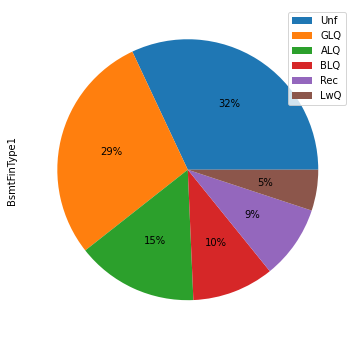

Unf    0.886301
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64


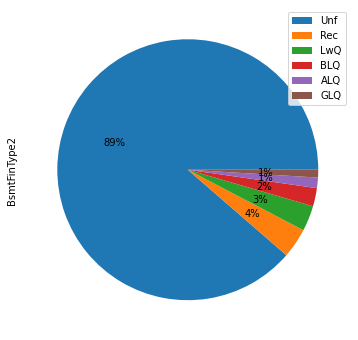

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64


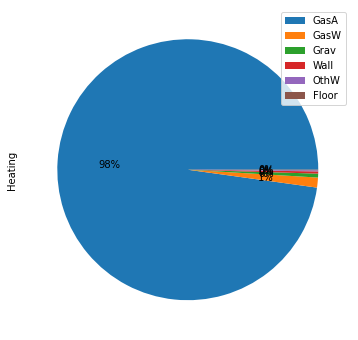

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64


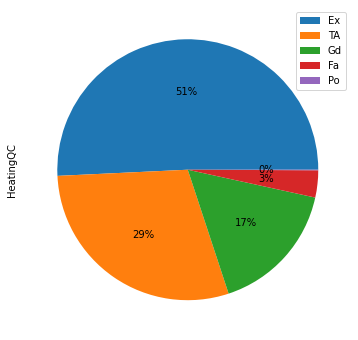

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64


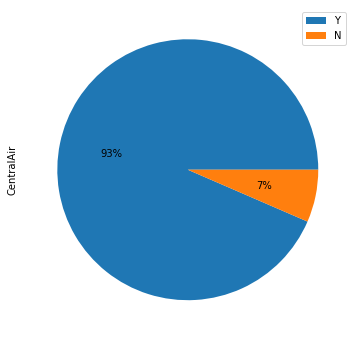

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64


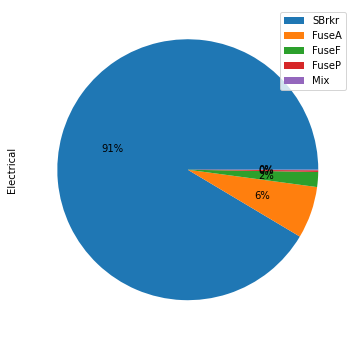

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


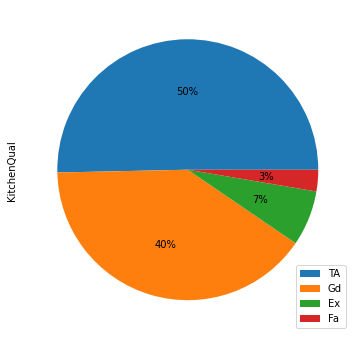

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functiol, dtype: float64


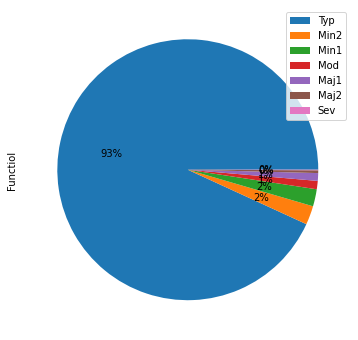

Attchd     0.651370
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


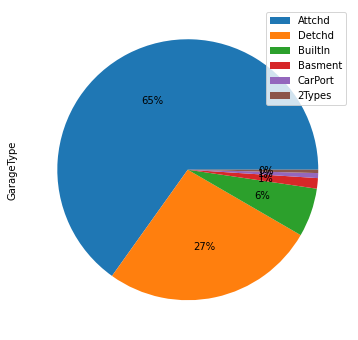

Unf    0.469863
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64


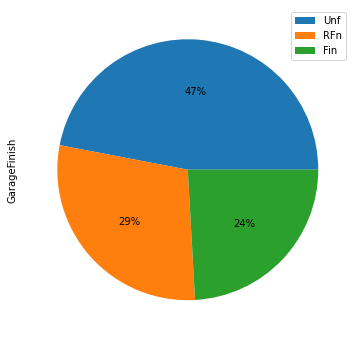

TA    0.953425
Fa    0.032877
Gd    0.009589
Po    0.002055
Ex    0.002055
Name: GarageQual, dtype: float64


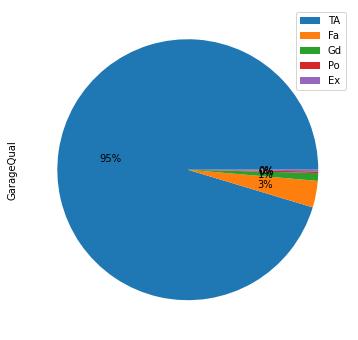

TA    0.963699
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64


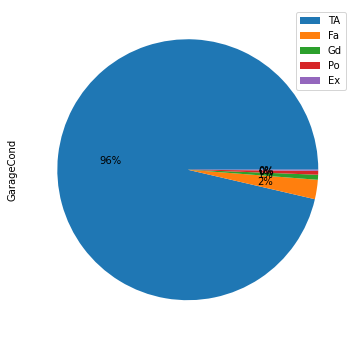

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64


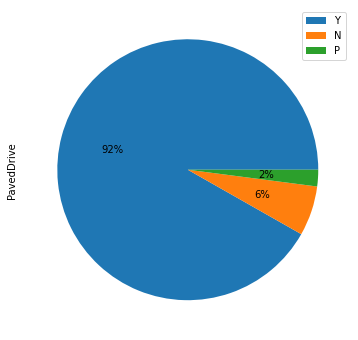

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64


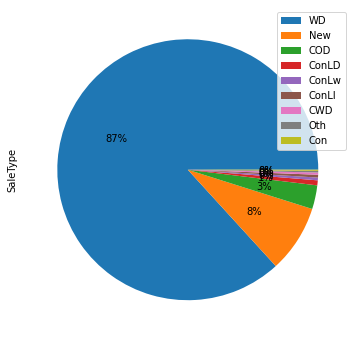

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64


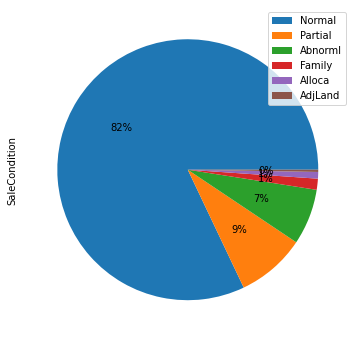

In [250]:
#Checking all object types Variables and their values

for i in CategoricalDs.columns:
    print(CategoricalDs[i].value_counts(normalize=True, dropna= False))
    plt.figure(figsize=[6,6])
    CategoricalDs[i].value_counts(normalize=True, dropna=False).plot.pie(autopct='%1.f%%',labeldistance=None)
    plt.legend()
    plt.show()

In [252]:
columns1 = list(CategoricalDs.columns)
columns1

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functiol',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [253]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(len(columns1)):
    CategoricalDs[columns1[i]] = le.fit_transform(CategoricalDs[columns1[i]])

CategoricalDs.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0             5           2           2  ...           4            2   
1            23           1           2  ...           4            3   
2             5           2           2  ...           4            2   
3             6           2           2  ...           4            2   
4            14           2           2  ...           4            2   

   Functiol  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0         6           1             1           4           4           2   
1         6           1             1           4           4           2   
2         6           1             1           4           4           2   
3         6           5             2           4           4           2   
4         6           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 38 columns]

#### 5.3 Identify significant variables using p-values and Chi-Square values

In [254]:
CategoricalDs.dtypes

MSZoning         int32
Street           int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
KitchenQual      int32
Functiol         int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
SaleType         int32
SaleCondition    int32
dtype: object

In [255]:
from sklearn.feature_selection import chi2

In [256]:
# Finding p_value for all columns and putting them in the resultant matrix

resultant = pd.DataFrame(data=[(0 for i in range(len(CategoricalDs.columns))) for i in range(len(CategoricalDs.columns))], 
                         columns=list(CategoricalDs.columns))
resultant.set_index(pd.Index(list(CategoricalDs.columns)), inplace = True)

for i in list(CategoricalDs.columns):
    for j in list(CategoricalDs.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(CategoricalDs[i]).reshape(-1, 1), np.array(CategoricalDs[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                   MSZoning        Street      LotShape    LandContour  \
MSZoning       0.000000e+00  2.240263e-01  8.084100e-01   8.640401e-01   
Street         9.833396e-01  0.000000e+00  9.992979e-01   9.930060e-01   
LotShape       3.579833e-23  6.929547e-01  0.000000e+00   1.640539e-08   
LandContour    2.262993e-01  5.992007e-02  1.497331e-01   0.000000e+00   
Utilities      9.917580e-01  9.487806e-01  5.689832e-01   9.901500e-01   
LotConfig      3.189006e-02  6.185088e-01  1.182308e-15   6.000902e-01   
LandSlope      1.721276e-03  3.449360e-14  7.965418e-10  8.888445e-150   
Neighborhood   1.021849e-78  6.571730e-01  4.979822e-04   2.894545e-14   
Condition1     4.123446e-01  9.534530e-02  1.816523e-02   9.120752e-01   
Condition2     9.970505e-01  9.886416e-01  9.919526e-01   9.722521e-01   
BldgType       2.151745e-85  2.344285e-01  1.458035e-13   1.790880e-04   
HouseStyle     1.586637e-08  3.208164e-01  1.590245e-04   1.105914e-02   
RoofStyle      3.985545e-02  5.961560e

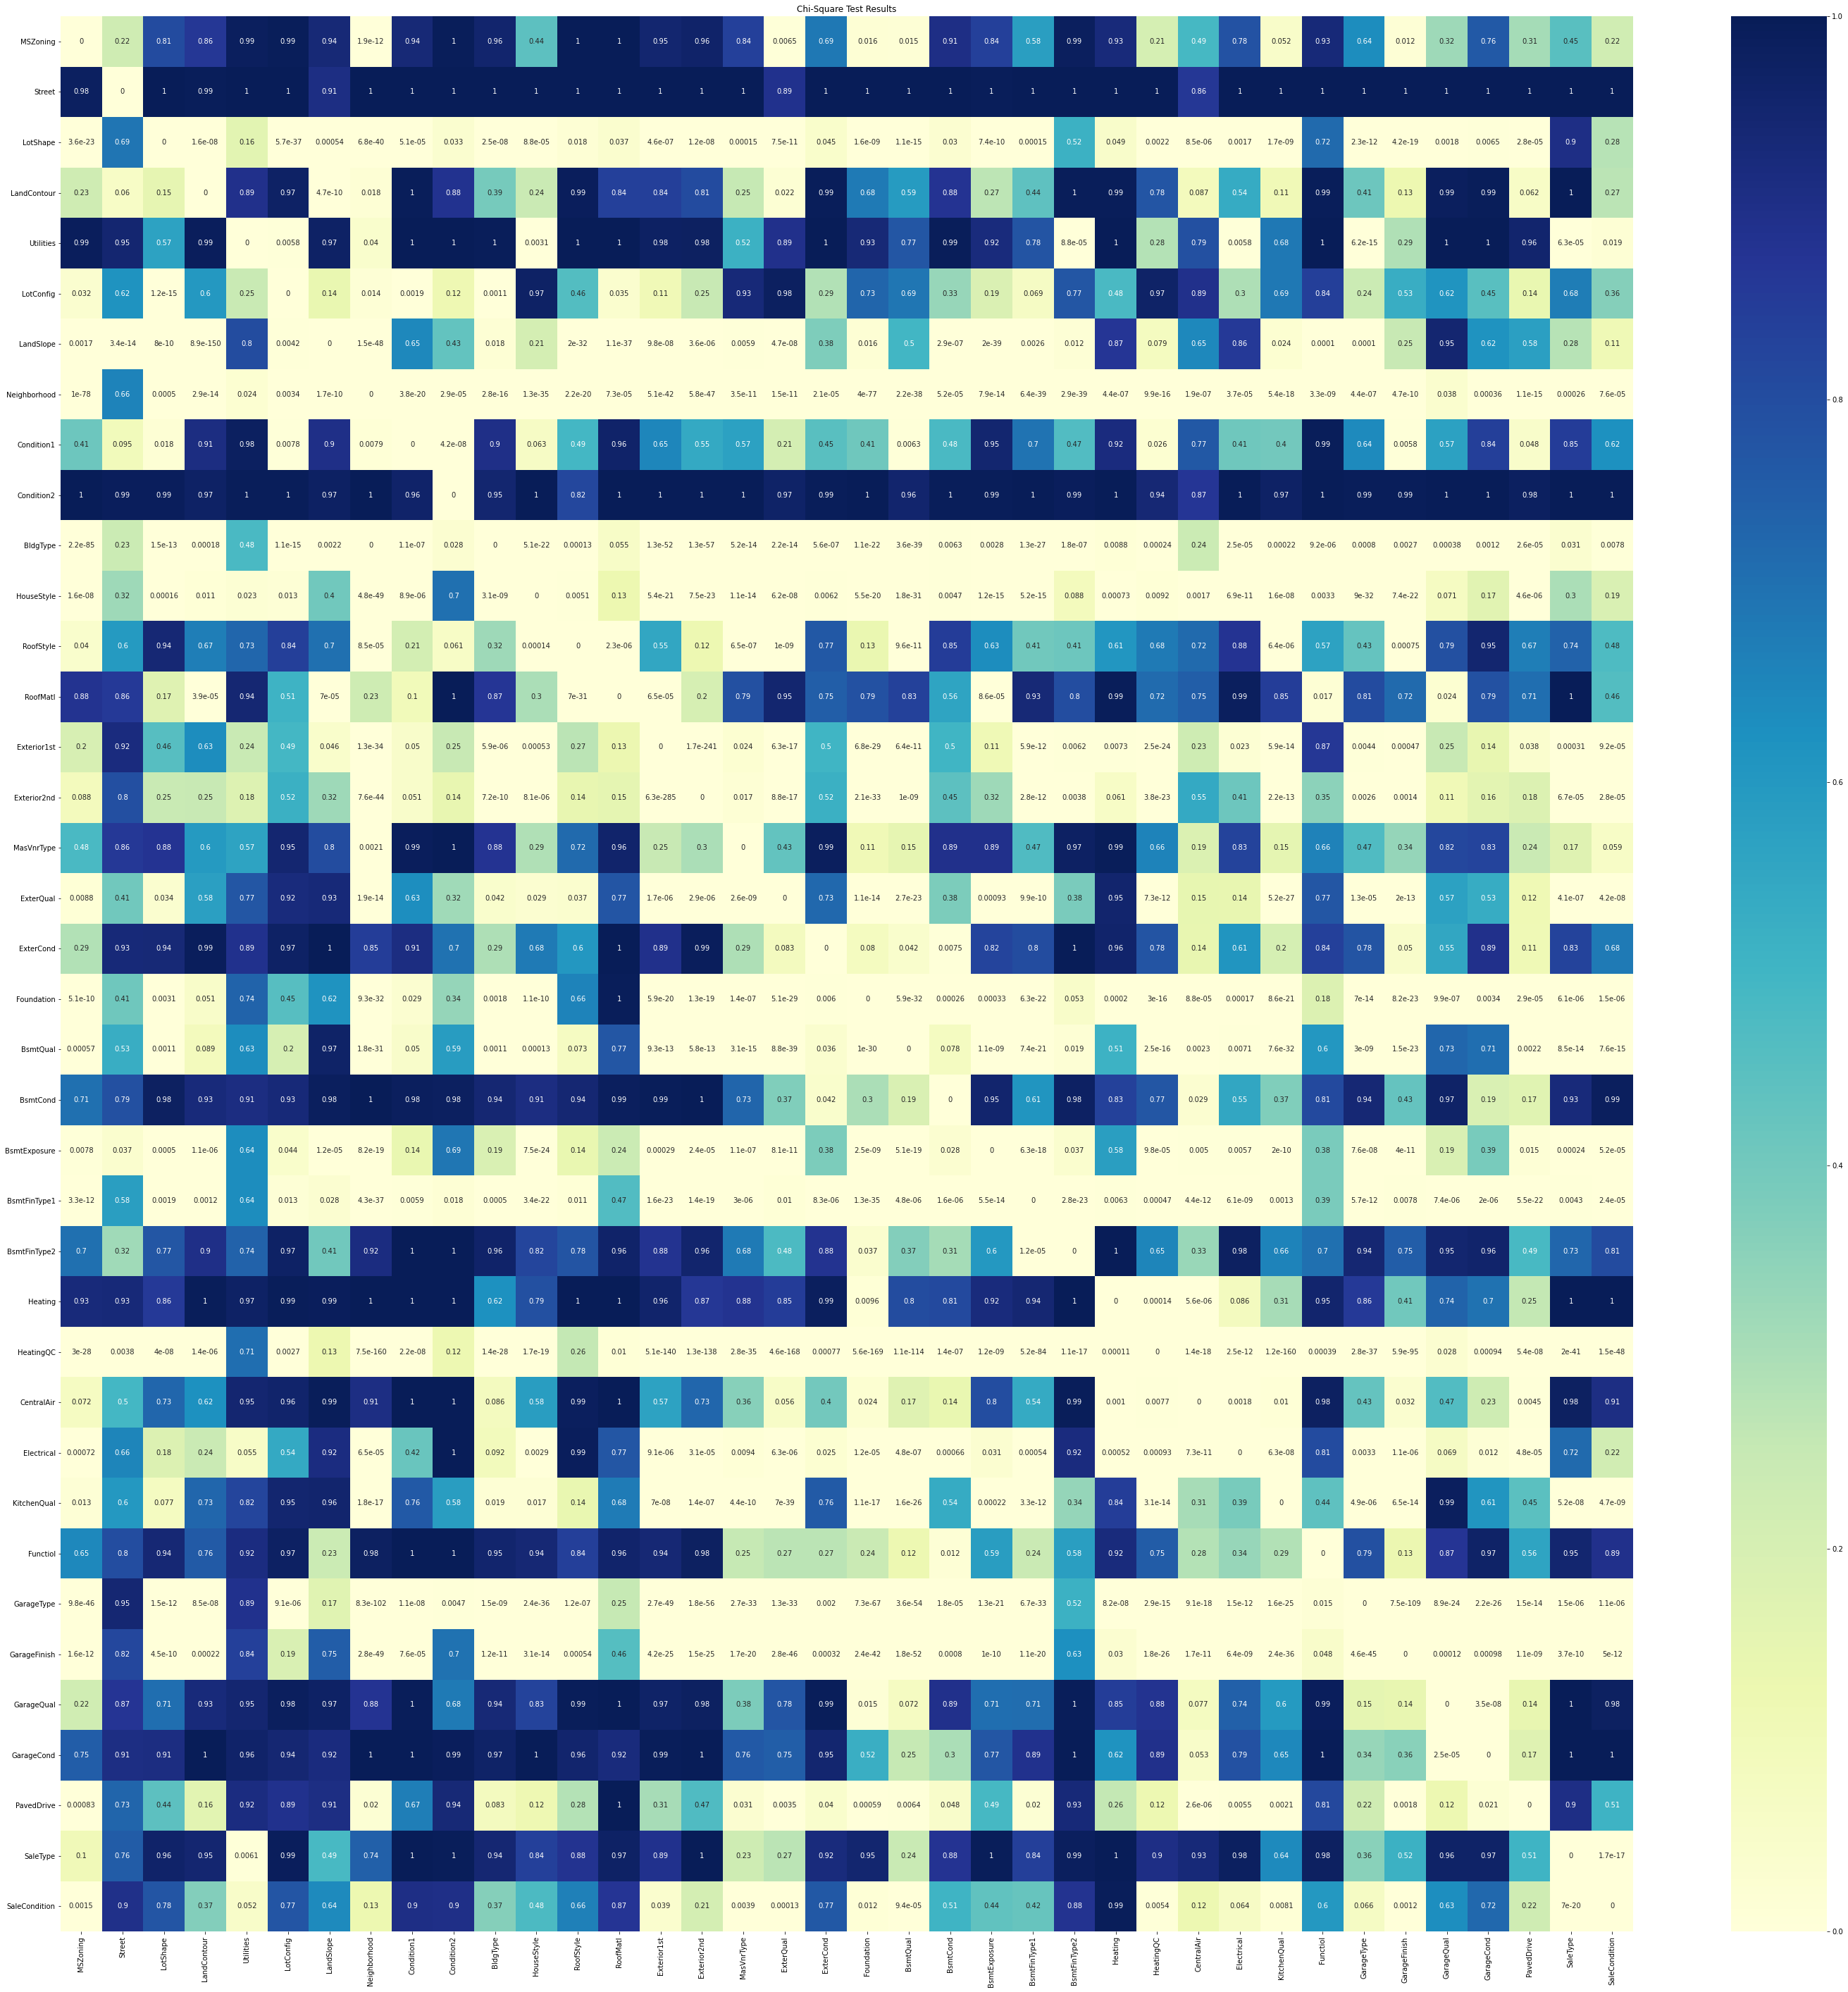

In [266]:
# Plotting a heatmap
fig = plt.figure(figsize=(50,50))
sns.heatmap(resultant, annot=True, cmap='YlGnBu')
plt.title('Chi-Square Test Results')
plt.show()

1. MSZoning is having high correlation with Neighborhood, ExterQual,Foundation, BsmtQual, KitchenQual and GarageFinish  features as their P-value is less than 0.05 and basically 0 or tending to zero in this case.This means, those features are depenent.
2. Street feature is not having any relation with other features as P-value is greater than 0.05. This means this feature is independent with other features.
3. LotShape is having high correlation with many other featrues
4. LandContour is having high correoation with Lotshape, LandSlope, Neighborhood, BldgType, HouseStyle,RoofMati,BasmtExposure,BasmtFinType1 etc.

#### From the above heatmap, the below features are significant features as there P-value is leass than 0.05 with more than 5 features:
MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,
RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,
BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,PavedDrive,
SaleCondition

# 5. Combine all the significant categorical and numerical variables

In [268]:
Num_Imp =['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF', 'GrLivArea', 'FullBath','TotRmsAbvGrd','GarageCars', 'GarageArea']

In [270]:
Num_Imp_ds = NumercalDs[Num_Imp]
Num_Imp_ds.shape

(1371, 10)

In [276]:
Num_Imp_ds.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0         2             8           2         548  
1         2             6           2         460  
2         2             6           2         608  
3         1             7           3         642  
4         2             9           3         836

In [275]:
CategoricalDs.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0             5           2           2  ...           4            2   
1            23           1           2  ...           4            3   
2             5           2           2  ...           4            2   
3             6           2           2  ...           4            2   
4            14           2           2  ...           4            2   

   Functiol  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0         6           1             1           4           4           2   
1         6           1             1           4           4           2   
2         6           1             1           4           4           2   
3         6           5             2           4           4           2   
4         6           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 38 columns]

In [281]:
Cat_Imp_ds = CategoricalDs[['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',
                           'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                           'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                           'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                           'Electrical','KitchenQual','GarageType','GarageFinish','PavedDrive','SaleCondition']]
Cat_Imp_ds.shape

(1460, 32)

In [282]:
Final_Ds = pd.concat([Num_Imp_ds,Cat_Imp_ds],axis=1)

In [283]:
Final_Ds.shape

(1460, 42)

In [289]:
Final_Ds.isnull().sum() 

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleCondition    0
dtype: int64

In [287]:
Final_Ds=Final_Ds[~Final_Ds.OverallQual.isnull()]

In [290]:
Final_Ds.shape

(1371, 42)

# 6. Plot box plot for the new dataset to find the variables with outliers

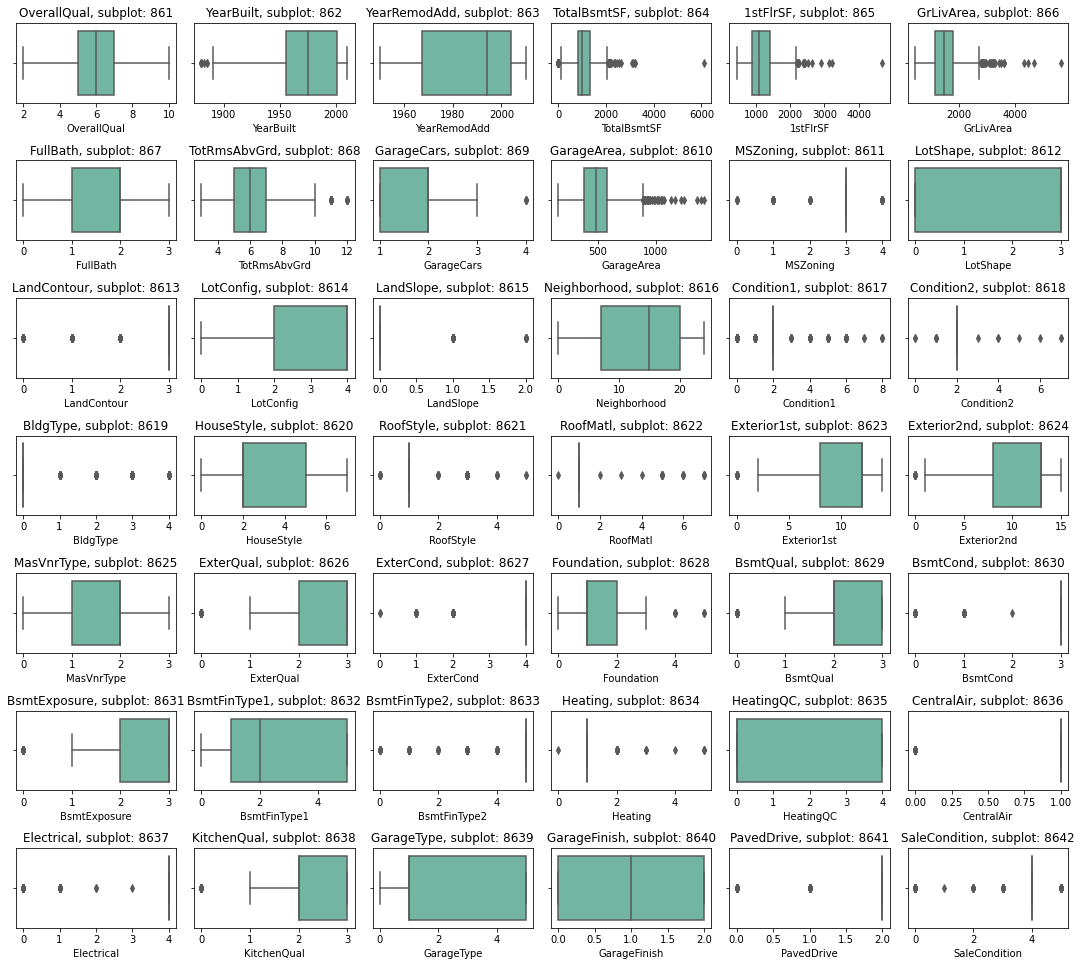

In [291]:
m = 8  # number of rows
n = 6  # number of columns
q = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in Final_Ds.columns:
    plt.subplot(m, n, q)
    plt.title('{}, subplot: {}{}{}'.format(i, m, n, q))
    plt.xlabel(i)
    sns.boxplot(Final_Ds[i],palette="Set2")
    q = q + 1

fig.tight_layout()
plt.show()